In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import rl_equation_solver
from rl_equation_solver.environment.algebraic import Env
from rl_equation_solver.agent.dqn import Agent as AgentDQN
from rl_equation_solver.agent.gcn import Agent as AgentGCN
from rl_equation_solver.agent.lstm import Agent as AgentLSTM
from rl_equation_solver.utilities import utilities
from rl_equation_solver.utilities.utilities import GraphEmbedding
import networkx as nx
import numpy as np
from torch_geometric.utils.convert import from_networkx
import matplotlib.pyplot as plt
from rex import init_logger
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.evaluation import evaluate_policy
from gymnasium import spaces
from gymnasium.vector.utils.spaces import batch_space
from stable_baselines3.common.env_checker import check_env
from sympy import symbols

In [87]:
init_logger(__name__, log_level='DEBUG')
init_logger('rl_equation_solver', log_level="DEBUG")

<Logger rl_equation_solver (DEBUG)>

In [88]:
env = Env(order=2)

INFO - 2023-04-16 08:07:45,846 [algebraic.py:102] : Initializing environment with order=2, |S| = 15 x 256 = 3840


In [89]:
env._initial_state = symbols('1')

In [90]:
check_env(env, warn=True)

In [91]:
model = A2C("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [92]:
model.learn(total_timesteps=int(1e5))

INFO - 2023-04-16 08:07:55,199 [algebraic.py:291] : {'episode_number': 0, 'step_number': 17, 'complexity': 37, 'loss': 'nan', 'reward': '-6.000e+00', 'state': (1 + a0 + a1)/(a0**2*a1)}
INFO - 2023-04-16 08:07:55,527 [algebraic.py:291] : {'episode_number': 1, 'step_number': 24, 'complexity': 37, 'loss': 'nan', 'reward': '-8.000e+00', 'state': ((1 - a0)/a0)**a1}
INFO - 2023-04-16 08:07:55,810 [algebraic.py:291] : {'episode_number': 2, 'step_number': 29, 'complexity': 37, 'loss': 'nan', 'reward': '-2.000e+00', 'state': ((1 - a0)/a0)**a1 - 1}
INFO - 2023-04-16 08:07:56,864 [algebraic.py:291] : {'episode_number': 3, 'step_number': 68, 'complexity': 23, 'loss': 'nan', 'reward': '8.000e+00', 'state': ((1 - a1)**a1)**a0 - 1}
INFO - 2023-04-16 08:07:58,260 [algebraic.py:291] : {'episode_number': 4, 'step_number': 100, 'complexity': 35, 'loss': 'nan', 'reward': '-8.000e+00', 'state': (2*a0 + 1)/(a0**2*a1**3)}
INFO - 2023-04-16 08:07:59,423 [algebraic.py:291] : {'episode_number': 5, 'step_number'

In [80]:
def make_hist_plot(env, start=0):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    avg_complex = []
    avg_reward = []
    avg_loss = []
    for episode in list(env.history.keys())[start:]:
        avg_complex.append(np.mean(env.history[episode]['complexity']))
        avg_loss.append(np.nanmean(env.history[episode]['loss']))
        avg_reward.append(np.mean(env.history[episode]['reward']))

    plt.hist(avg_reward)
    plt.xlabel('Reward')
    plt.ylabel('Count')

def moving_avg(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def make_plot(env, start=0):
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))
    avg_complex = []
    avg_reward = []
    avg_loss = []
    for episode in list(env.history.keys())[start:]:
        avg_complex.append(np.mean(env.history[episode]['complexity']))
        avg_loss.append(np.nanmean(env.history[episode]['loss']))
        avg_reward.append(np.mean(env.history[episode]['reward']))
    
    y = moving_avg(avg_complex, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[0].scatter(x, y)
    ax[0].plot(x, a*x+b, color='red')

    y = moving_avg(avg_loss, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[1].scatter(x, y)
    ax[1].plot(x, a*x+b, color='red')
    
    y = moving_avg(avg_reward, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[2].scatter(x, y)
    ax[2].plot(x, a*x+b, color='red')
    
    ax[0].set_title('Complexity')
    ax[1].set_title('Loss')
    ax[2].set_title("Reward")
    plt.annotate('Episode', (0.4, 0.01), xycoords='figure fraction')



C:\Users\bbent\AppData\Local\Temp\ipykernel_18492\3900907531.py:8: RuntimeWarning: Mean of empty slice
  avg_loss.append(np.nanmean(env.history[episode]['loss']))


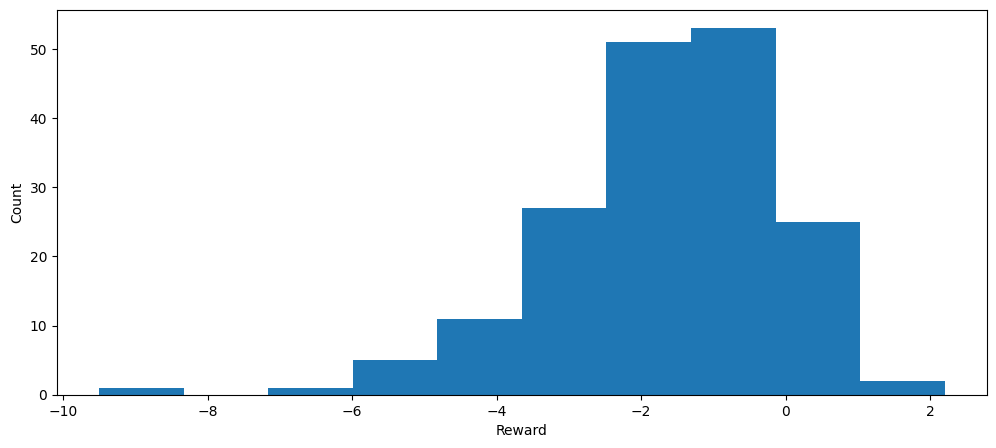

In [81]:
make_hist_plot(env)

In [84]:
len(list(env.history.keys()))

176

C:\Users\bbent\AppData\Local\Temp\ipykernel_18492\3900907531.py:25: RuntimeWarning: Mean of empty slice
  avg_loss.append(np.nanmean(env.history[episode]['loss']))


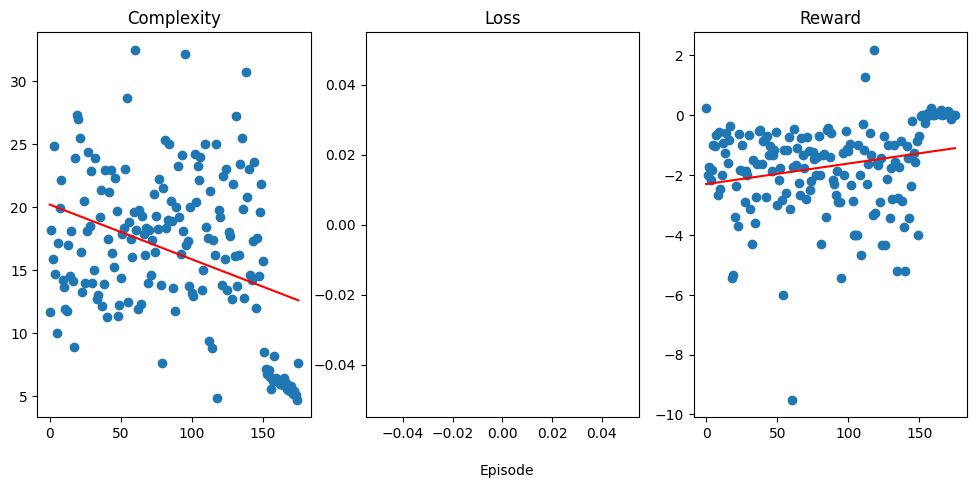

In [78]:
make_plot(env)